# QFAT - Group Project - Group 16

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\Samuel\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Importing data

In [2]:
df1 = pd.read_csv('NL_FR_BE_data_monthly.csv')
df2 = pd.read_csv('NL_FR_BE_data_annual.csv')
df4 = pd.read_csv('Europe_FF_Factors.csv')

# look at the data
print('df1 - NL_FR_BE_data_monthly - Monthly data for 1846 firms from the Netherlands, France and Belgium')
display(df1)

print('df2 - NL_FR_BE_data_annual - Yearly data for 1846 firms from the Netherlands, France and Belgium')
display(df2)

print('df4 - Europe_FF_Factors')
display(df4)

df1 - NL_FR_BE_data_monthly - Monthly data for 1846 firms from the Netherlands, France and Belgium


,ISIN,mdate,RET,RET11,ME,b,h,s,ivol
0,FR0000078875,200110,-0.0376,0.1122,18.3645,0.7979,0.4265,1.0945,0.0402
1,FR0000078875,200111,-0.0444,-0.0147,17.5492,0.8795,0.6104,1.1042,0.0533
2,FR0000078875,200112,-0.0137,-0.2766,17.3088,0.8696,0.6413,1.0696,0.0129
3,FR0000078875,200201,0.0942,-0.1528,18.9398,0.7082,0.1435,1.2752,0.0651
4,FR0000078875,200202,0.0276,-0.0070,19.4618,0.7873,0.2618,1.3471,0.0369
...,...,...,...,...,...,...,...,...,...
235689,FR0000039539,200410,-0.0711,0.4320,99.6765,1.0470,-0.9141,1.3148,0.0245
235690,FR0000039539,200411,0.1840,0.4724,118.0193,1.1358,-0.2908,1.6981,0.0490
235691,FR0000039539,200412,0.0089,0.2307,119.0678,1.1330,-0.3969,1.8439,0.0097
235692,FR0000039539,200501,-0.0214,0.0930,116.5239,1.0216,-1.4111,1.1242,0.0064


df2 - NL_FR_BE_data_annual - Yearly data for 1846 firms from the Netherlands, France and Belgium


,ISIN,fyear,BEME,OP,INV
0,ANN4327C1220,1990,0.6576,0.5865,0.0100
1,ANN4327C1220,1991,0.5890,0.5048,0.1150
2,ANN4327C1220,1992,0.7228,0.5371,-0.0055
3,ANN4327C1220,1993,0.3773,0.5429,0.0101
4,ANN4327C1220,1994,0.4160,0.6629,0.1190
...,...,...,...,...,...
21903,ZM0000000037,2013,17.2958,-0.0135,0.1457
21904,ZM0000000037,2014,15.8610,0.0616,0.2071
21905,ZM0000000037,2015,41.9586,-0.2238,-0.0991
21906,ZM0000000037,2016,14.6029,-0.0142,0.1579


df4 - Europe_FF_Factors


,mdate,MktRF,SMB,HML,RF,WML
0,199106,-0.0741,0.0061,-0.0069,0.0042,0.0054
1,199107,0.0530,-0.0323,-0.0035,0.0049,0.0506
2,199108,0.0142,-0.0093,-0.0008,0.0046,0.0377
3,199109,0.0302,0.0173,-0.0005,0.0046,0.0423
4,199110,-0.0262,-0.0078,-0.0130,0.0042,0.0307
...,...,...,...,...,...,...
344,202002,-0.0898,0.0029,-0.0073,0.0012,0.0077
345,202003,-0.1544,-0.0422,-0.1130,0.0012,0.0755
346,202004,0.0670,0.0504,-0.0381,0.0000,0.0102
347,202005,0.0543,0.0121,-0.0414,0.0001,0.0290


## Create new dataframes

### Modify df1

In [3]:
# modify df1
df1_modified = df1.copy()

# create year and month columns
df1_modified['year'] = df1_modified['mdate']
df1_modified['month'] = df1_modified['mdate']
df1_modified['year'] = df1_modified['year'].astype(str).str[:-2].astype(np.int64)
df1_modified['month'] = df1_modified['month'].astype(str).str[-2:].astype(np.int64)

# drop unnecessary columns
df1_modified.drop(['ME', 'b', 'h', 's', 'ivol'], axis=1, inplace=True)

In [4]:
df1_modified

,ISIN,mdate,RET,RET11,year,month
0,FR0000078875,200110,-0.0376,0.1122,2001,10
1,FR0000078875,200111,-0.0444,-0.0147,2001,11
2,FR0000078875,200112,-0.0137,-0.2766,2001,12
3,FR0000078875,200201,0.0942,-0.1528,2002,1
4,FR0000078875,200202,0.0276,-0.0070,2002,2
...,...,...,...,...,...,...
235689,FR0000039539,200410,-0.0711,0.4320,2004,10
235690,FR0000039539,200411,0.1840,0.4724,2004,11
235691,FR0000039539,200412,0.0089,0.2307,2004,12
235692,FR0000039539,200501,-0.0214,0.0930,2005,1


### Modify df2

In [5]:
# modify df2
df2_modified = df2.copy()

# create a new column called year which is equal 
# to the column fyear, we do this for merging with df1
df2_modified['year'] = df2_modified['fyear']

In [6]:
df2_modified

,ISIN,fyear,BEME,OP,INV,year
0,ANN4327C1220,1990,0.6576,0.5865,0.0100,1990
1,ANN4327C1220,1991,0.5890,0.5048,0.1150,1991
2,ANN4327C1220,1992,0.7228,0.5371,-0.0055,1992
3,ANN4327C1220,1993,0.3773,0.5429,0.0101,1993
4,ANN4327C1220,1994,0.4160,0.6629,0.1190,1994
...,...,...,...,...,...,...
21903,ZM0000000037,2013,17.2958,-0.0135,0.1457,2013
21904,ZM0000000037,2014,15.8610,0.0616,0.2071,2014
21905,ZM0000000037,2015,41.9586,-0.2238,-0.0991,2015
21906,ZM0000000037,2016,14.6029,-0.0142,0.1579,2016


### Merge df1 and df2

In [7]:
merged_df = pd.merge(df1_modified, df2_modified, on=['ISIN','year'])

In [8]:
merged_df

,ISIN,mdate,RET,RET11,year,month,fyear,BEME,OP,INV
0,FR0000078875,200110,-0.0376,0.1122,2001,10,2001,0.4078,0.4951,0.4382
1,FR0000078875,200111,-0.0444,-0.0147,2001,11,2001,0.4078,0.4951,0.4382
2,FR0000078875,200112,-0.0137,-0.2766,2001,12,2001,0.4078,0.4951,0.4382
3,FR0000078875,200201,0.0942,-0.1528,2002,1,2002,0.5671,0.4756,0.2441
4,FR0000078875,200202,0.0276,-0.0070,2002,2,2002,0.5671,0.4756,0.2441
...,...,...,...,...,...,...,...,...,...,...
216137,FR0000039539,200308,0.1523,1.1831,2003,8,2003,0.3525,0.5873,0.1316
216138,FR0000039539,200309,0.1932,2.6752,2003,9,2003,0.3525,0.5873,0.1316
216139,FR0000039539,200310,0.0541,1.6702,2003,10,2003,0.3525,0.5873,0.1316
216140,FR0000039539,200311,0.0136,1.2236,2003,11,2003,0.3525,0.5873,0.1316


### Modify df4

In [9]:
# modify df4 --> no need to modify df4
df4

,mdate,MktRF,SMB,HML,RF,WML
0,199106,-0.0741,0.0061,-0.0069,0.0042,0.0054
1,199107,0.0530,-0.0323,-0.0035,0.0049,0.0506
2,199108,0.0142,-0.0093,-0.0008,0.0046,0.0377
3,199109,0.0302,0.0173,-0.0005,0.0046,0.0423
4,199110,-0.0262,-0.0078,-0.0130,0.0042,0.0307
...,...,...,...,...,...,...
344,202002,-0.0898,0.0029,-0.0073,0.0012,0.0077
345,202003,-0.1544,-0.0422,-0.1130,0.0012,0.0755
346,202004,0.0670,0.0504,-0.0381,0.0000,0.0102
347,202005,0.0543,0.0121,-0.0414,0.0001,0.0290


### Quick data analysis of Investment (INV)
This shows that Investment (INV) of the companies vary over time. 
Therefore it makes sense to sort them in different portfolios every year.

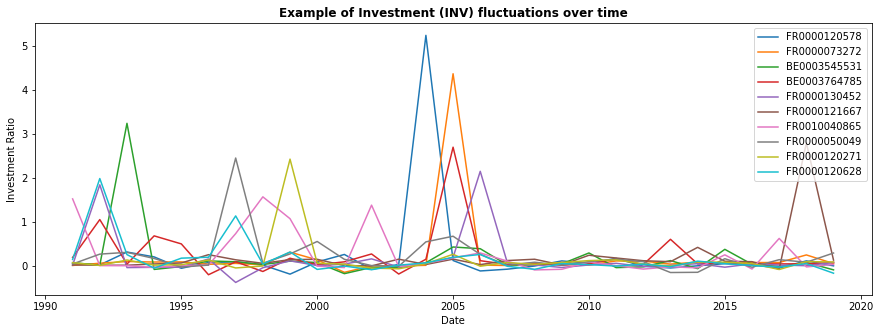

In [10]:
data_plot_df = merged_df.copy()

# pivot the dataframe to wide format
data_plot_df = pd.pivot(merged_df, index='mdate', columns='ISIN', values='INV')
data_plot_df = data_plot_df.reset_index()
data_plot_df['mdate'] = data_plot_df['mdate'].astype(str).str[:-2].astype(np.int64)
data_plot_df.set_index('mdate', inplace=True)

# remove companies where INV is NaN at least once
data_plot_df = data_plot_df.dropna(axis=1)

# get the standard deviation of INV per company over the whole time period
company_name = []
standard_deviation_INV = []

for i in data_plot_df:
    company_name.append(i)
    standard_deviation_INV.append(data_plot_df[i].std())

df_standard_deviation_INV = pd.DataFrame({'ISIN': company_name, 'Std_Dev': standard_deviation_INV,})

# create a dataframe with the companies that have the largest standard deviation of OP
df_largest_INV = df_standard_deviation_INV.nlargest(10, ['Std_Dev'])
df_largest_INV.reset_index(inplace=True)
df_largest_INV.drop(columns=['index'], axis=1, inplace=True)

# plot the OP of the companies with largest standard deviation of OP
list_largest_INV = []

for i in df_largest_INV['ISIN']:
    list_largest_INV.append(i)

df_INV_top10 = data_plot_df[list_largest_INV]



plt.figure(figsize=(15, 5))
plt.title("Example of Investment (INV) fluctuations over time", fontweight='bold')

for company in list_largest_INV:
    plt.plot(df_INV_top10.index, df_INV_top10[company], label=company)

plt.xlabel("Date")
plt.ylabel("Investment Ratio")
plt.legend()
plt.show()

# Defining sorting function

In [11]:
# arguments are
# x: a vector of returns
# P: the number of portfolios we want
# we assign P=10 as a default value, so unless we want 
# a different number of portfolios than 10, 
# we do not need to set a value for P
def sortPort(x, P = 10):
    # in case all elements are missing, return a vector of missings
    if sum(pd.isnull(x)) == len(x):
        return x
    # assign a portfolio-number to each stock-observation in a particular month
    ranks = pd.qcut(x , P, labels = False, duplicates ='drop') + 1
    # return the portfolio-number and add a 'p' and a leading zero in front
    ranks = ranks.apply(lambda x: 'p'+str(int(x)).zfill(2) 
                        if not pd.isnull(x) else x)
    return ranks

# Calculating momentum returns

In [12]:
# lag INV by 19 months
merged_df['INV_lag'] = merged_df.groupby('ISIN')['INV'].shift(19)
display(merged_df)

,ISIN,mdate,RET,RET11,year,month,fyear,BEME,OP,INV,INV_lag
0,FR0000078875,200110,-0.0376,0.1122,2001,10,2001,0.4078,0.4951,0.4382,NaN
1,FR0000078875,200111,-0.0444,-0.0147,2001,11,2001,0.4078,0.4951,0.4382,NaN
2,FR0000078875,200112,-0.0137,-0.2766,2001,12,2001,0.4078,0.4951,0.4382,NaN
3,FR0000078875,200201,0.0942,-0.1528,2002,1,2002,0.5671,0.4756,0.2441,NaN
4,FR0000078875,200202,0.0276,-0.0070,2002,2,2002,0.5671,0.4756,0.2441,NaN
...,...,...,...,...,...,...,...,...,...,...,...
216137,FR0000039539,200308,0.1523,1.1831,2003,8,2003,0.3525,0.5873,0.1316,0.0339
216138,FR0000039539,200309,0.1932,2.6752,2003,9,2003,0.3525,0.5873,0.1316,0.0684
216139,FR0000039539,200310,0.0541,1.6702,2003,10,2003,0.3525,0.5873,0.1316,0.0684
216140,FR0000039539,200311,0.0136,1.2236,2003,11,2003,0.3525,0.5873,0.1316,0.0684


In [13]:
# apply our sortPort function to each month (groupby 'mdate') separately
# here, we are using the lagged 11-month return as a sorting variable
merged_df['inv_sort_port'] = merged_df.groupby(['mdate'])['INV_lag'].apply(lambda x: sortPort(x))
display(merged_df)

,ISIN,mdate,RET,RET11,year,month,fyear,BEME,OP,INV,INV_lag,inv_sort_port
0,FR0000078875,200110,-0.0376,0.1122,2001,10,2001,0.4078,0.4951,0.4382,NaN,NaN
1,FR0000078875,200111,-0.0444,-0.0147,2001,11,2001,0.4078,0.4951,0.4382,NaN,NaN
2,FR0000078875,200112,-0.0137,-0.2766,2001,12,2001,0.4078,0.4951,0.4382,NaN,NaN
3,FR0000078875,200201,0.0942,-0.1528,2002,1,2002,0.5671,0.4756,0.2441,NaN,NaN
4,FR0000078875,200202,0.0276,-0.0070,2002,2,2002,0.5671,0.4756,0.2441,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
216137,FR0000039539,200308,0.1523,1.1831,2003,8,2003,0.3525,0.5873,0.1316,0.0339,p07
216138,FR0000039539,200309,0.1932,2.6752,2003,9,2003,0.3525,0.5873,0.1316,0.0684,p07
216139,FR0000039539,200310,0.0541,1.6702,2003,10,2003,0.3525,0.5873,0.1316,0.0684,p07
216140,FR0000039539,200311,0.0136,1.2236,2003,11,2003,0.3525,0.5873,0.1316,0.0684,p07


In [14]:
# calculate (equal weighted) portfolio returns 
# for each of the 10 portfolios in each month
inv_sort_port = merged_df.groupby(['mdate','inv_sort_port'])['RET'].mean()
inv_sort_port = inv_sort_port.reset_index()
display(inv_sort_port)

,mdate,inv_sort_port,RET
0,199301,p01,0.072797
1,199301,p02,0.003926
2,199301,p03,0.036294
3,199301,p04,0.028947
4,199301,p05,0.010015
...,...,...,...
3235,201912,p06,0.048867
3236,201912,p07,0.057750
3237,201912,p08,0.026578
3238,201912,p09,0.048640


In [15]:
# convert from long to wide format
inv_sort_port = inv_sort_port.pivot(index = 'mdate', columns = 'inv_sort_port', values = 'RET')
display(inv_sort_port)

inv_sort_port,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10
mdate,,,,,,,,,,
199301,0.072797,0.003926,0.036294,0.028947,0.010015,0.033132,0.015215,0.029109,0.038685,0.011929
199302,0.026192,0.007353,0.057532,0.027877,0.027874,0.036008,0.044797,0.047321,0.040082,0.007446
199303,0.070415,0.108315,0.096688,0.088830,0.084715,0.071110,0.081693,0.063112,0.085205,0.095017
199304,0.034393,0.027976,0.023778,0.027627,0.002251,0.039161,0.023844,0.029995,0.013278,0.020952
199305,-0.012064,-0.018214,-0.005420,-0.006129,-0.021419,0.008027,-0.009091,-0.021115,0.008455,-0.021829
...,...,...,...,...,...,...,...,...,...,...
201908,-0.011338,-0.024059,-0.037259,-0.028157,-0.037722,-0.031904,-0.030019,-0.029346,-0.038648,-0.021882
201909,-0.015651,0.003973,0.016015,-0.005344,0.006615,0.019787,0.002784,-0.016157,-0.013900,-0.015776
201910,0.029709,0.033876,0.022049,0.023639,0.013718,0.027741,0.016039,0.050975,0.010637,0.012858


In [16]:
# calculate long-short winner-loser portfolio (excess) return
inv_sort_port['INV'] = inv_sort_port['p01'] - inv_sort_port['p10']
display(inv_sort_port)

inv_sort_port,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,INV
mdate,,,,,,,,,,,
199301,0.072797,0.003926,0.036294,0.028947,0.010015,0.033132,0.015215,0.029109,0.038685,0.011929,0.060868
199302,0.026192,0.007353,0.057532,0.027877,0.027874,0.036008,0.044797,0.047321,0.040082,0.007446,0.018746
199303,0.070415,0.108315,0.096688,0.088830,0.084715,0.071110,0.081693,0.063112,0.085205,0.095017,-0.024602
199304,0.034393,0.027976,0.023778,0.027627,0.002251,0.039161,0.023844,0.029995,0.013278,0.020952,0.013440
199305,-0.012064,-0.018214,-0.005420,-0.006129,-0.021419,0.008027,-0.009091,-0.021115,0.008455,-0.021829,0.009764
...,...,...,...,...,...,...,...,...,...,...,...
201908,-0.011338,-0.024059,-0.037259,-0.028157,-0.037722,-0.031904,-0.030019,-0.029346,-0.038648,-0.021882,0.010544
201909,-0.015651,0.003973,0.016015,-0.005344,0.006615,0.019787,0.002784,-0.016157,-0.013900,-0.015776,0.000125
201910,0.029709,0.033876,0.022049,0.023639,0.013718,0.027741,0.016039,0.050975,0.010637,0.012858,0.016851


# Analyze momentum returns

In [17]:
# merge our portfolios with FF factors
portfolios = inv_sort_port.merge(df4, on = 'mdate')
display(portfolios)

,mdate,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,INV,MktRF,SMB,HML,RF,WML
0,199301,0.072797,0.003926,0.036294,0.028947,0.010015,0.033132,0.015215,0.029109,0.038685,0.011929,0.060868,0.0063,0.0328,0.0295,0.0023,-0.0136
1,199302,0.026192,0.007353,0.057532,0.027877,0.027874,0.036008,0.044797,0.047321,0.040082,0.007446,0.018746,0.0111,-0.0079,0.0174,0.0022,-0.0136
2,199303,0.070415,0.108315,0.096688,0.088830,0.084715,0.071110,0.081693,0.063112,0.085205,0.095017,-0.024602,0.0543,0.0143,0.0086,0.0025,0.0289
3,199304,0.034393,0.027976,0.023778,0.027627,0.002251,0.039161,0.023844,0.029995,0.013278,0.020952,0.013440,0.0192,0.0346,0.0193,0.0024,-0.0198
4,199305,-0.012064,-0.018214,-0.005420,-0.006129,-0.021419,0.008027,-0.009091,-0.021115,0.008455,-0.021829,0.009764,0.0091,0.0029,0.0150,0.0022,0.0102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,201908,-0.011338,-0.024059,-0.037259,-0.028157,-0.037722,-0.031904,-0.030019,-0.029346,-0.038648,-0.021882,0.010544,-0.0240,-0.0059,-0.0196,0.0016,0.0328
320,201909,-0.015651,0.003973,0.016015,-0.005344,0.006615,0.019787,0.002784,-0.016157,-0.013900,-0.015776,0.000125,0.0215,-0.0089,0.0308,0.0018,-0.0228
321,201910,0.029709,0.033876,0.022049,0.023639,0.013718,0.027741,0.016039,0.050975,0.010637,0.012858,0.016851,0.0327,0.0093,-0.0050,0.0015,-0.0119
322,201911,0.020813,-0.013748,0.024852,0.006904,0.000639,0.018571,0.023807,0.008791,0.027933,0.049982,-0.029169,0.0177,0.0207,-0.0224,0.0012,0.0070


In [18]:
# run a Fama-French 3-factor regression
# notice: inv_sort_port is already an excess return (self-financing portfolio)
# if you want to run the regression on another portfolio, 
# e.g., the winners (p10)
# you need to sutract the risk-free rate! 
# => formula="p10-RF~MktRF+HML+SMB"
x = portfolios[['MktRF', 'HML', 'SMB']]
x = sm.add_constant(x)
reg = sm.OLS(portfolios['INV'], x).fit(cov_type = 'HAC', cov_kwds = {'maxlags': 11})

# summarize the regression result
display(reg.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    INV   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     23.83
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           6.04e-14
Time:                        17:36:28   Log-Likelihood:                 734.61
No. Observations:                 324   AIC:                            -1461.
Df Residuals:                     320   BIC:                            -1446.
Df Model:                           3                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0046      0.001      3.261      0.001       0.002       0.007
MktRF         -0.1473      0.041     -3.585      0.000      -0.228      -0.067
HML            0.5602      0.075      7.492      0.000       0.414       0.707
SMB            0.1923      0.087      2.204      0.028       0.021       0.363
==============================================================================
Omnibus:                        9.114   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               15.590
Skew:                          -0.100   Prob(JB):                     0.000412
Kurtosis:                       4.056   Cond. No.                         47.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 11 lags and without small sample correction
"""

In [19]:
# calculate the standard deviation of the residuals (for the information ratio)
residuals = reg.resid
sigma_epsilon = np.std(residuals)

# save regression coefficients
coefs = reg.params

In [20]:
# Information Ratio (risk-adjusted abnormal returns)
print('Information Ratio =', np.round(coefs[0]/sigma_epsilon*np.sqrt(12),4))

# Sharpe Ratio (risk-adjusted returns)
print('Sharpe Ratio =', np.round(np.mean(portfolios['INV'])/np.std(portfolios['INV'])*np.sqrt(12),4))

Information Ratio = 0.6405
Sharpe Ratio = 0.6849


# Plotting cumulated returns

In [21]:
# convert portfolios returns to long format (plotnine ggplot requires this)
plotdata = portfolios.melt(id_vars = ['mdate'], var_name = 'portfolio', value_name = 'RET')
display(plotdata)

,mdate,portfolio,RET
0,199301,p01,0.072797
1,199302,p01,0.026192
2,199303,p01,0.070415
3,199304,p01,0.034393
4,199305,p01,-0.012064
...,...,...,...
5179,201908,WML,0.032800
5180,201909,WML,-0.022800
5181,201910,WML,-0.011900
5182,201911,WML,0.007000


In [22]:
# merge each return with risk-free rate in that month
plotdata = plotdata.merge(df4[['RF', 'mdate']], on = 'mdate')
display(plotdata)

,mdate,portfolio,RET,RF
0,199301,p01,0.072797,0.0023
1,199301,p02,0.003926,0.0023
2,199301,p03,0.036294,0.0023
3,199301,p04,0.028947,0.0023
4,199301,p05,0.010015,0.0023
...,...,...,...,...
5179,201912,MktRF,0.040700,0.0014
5180,201912,SMB,0.027900,0.0014
5181,201912,HML,0.004100,0.0014
5182,201912,RF,0.001400,0.0014


In [23]:
# calculate gross return = 1 + portfolio return (not excess!)
# so, since all of the factors are long-short portfolios,
# we need to add the risk-free rate 
# (that's what you earn on your collateral for the short-side)
# if we want to plot the 10 past-return-sorted portfolios later
# then we do not need to add the risk-free rate, 
# because these are not excess returns!
# so we filter by saying, whenever the portfolio is NOT in 
# this list of portfolio names, by using "in" and "not in"

ls_ports = ['INV','MktRF','HML','SMB','WML']

def makeGrossReturn(plotdata):
    if plotdata['portfolio'] in ls_ports:
        return 1 + plotdata['RET'] + plotdata['RF']
    if plotdata['portfolio'] not in ls_ports:
        return 1 + plotdata['RET']

In [24]:
plotdata['grossRET'] = plotdata.apply(makeGrossReturn, axis = 1)
display(plotdata)

,mdate,portfolio,RET,RF,grossRET
0,199301,p01,0.072797,0.0023,1.072797
1,199301,p02,0.003926,0.0023,1.003926
2,199301,p03,0.036294,0.0023,1.036294
3,199301,p04,0.028947,0.0023,1.028947
4,199301,p05,0.010015,0.0023,1.010015
...,...,...,...,...,...
5179,201912,MktRF,0.040700,0.0014,1.042100
5180,201912,SMB,0.027900,0.0014,1.029300
5181,201912,HML,0.004100,0.0014,1.005500
5182,201912,RF,0.001400,0.0014,1.001400


In [25]:
print(plotdata['mdate'].min())

199301


In [26]:
# set 1 dollar for first date, i.e., end of December 1992 (your initial investment)
initial_inv = plotdata.portfolio.unique()
initial_inv = pd.DataFrame(initial_inv, columns = ['portfolio'])
display(initial_inv)

,portfolio
0,p01
1,p02
2,p03
3,p04
4,p05
5,p06
6,p07
7,p08
8,p09
9,p10


In [27]:
initial_inv[['mdate','return','RF','grossRET']] = [199212, None, None, 1]
display(initial_inv)

,portfolio,mdate,return,RF,grossRET
0,p01,199212,None,None,1
1,p02,199212,None,None,1
2,p03,199212,None,None,1
3,p04,199212,None,None,1
4,p05,199212,None,None,1
5,p06,199212,None,None,1
6,p07,199212,None,None,1
7,p08,199212,None,None,1
8,p09,199212,None,None,1
9,p10,199212,None,None,1


In [28]:
plotdata1 = pd.concat([initial_inv, plotdata])
display(plotdata1)

,portfolio,mdate,return,RF,grossRET,RET
0,p01,199212,None,NaN,1.0000,NaN
1,p02,199212,None,NaN,1.0000,NaN
2,p03,199212,None,NaN,1.0000,NaN
3,p04,199212,None,NaN,1.0000,NaN
4,p05,199212,None,NaN,1.0000,NaN
...,...,...,...,...,...,...
5179,MktRF,201912,NaN,0.0014,1.0421,0.0407
5180,SMB,201912,NaN,0.0014,1.0293,0.0279
5181,HML,201912,NaN,0.0014,1.0055,0.0041
5182,RF,201912,NaN,0.0014,1.0014,0.0014


In [29]:
# calculate cumulated return (that's why we needed the 1+ earlier)
# now we get 1*(1+return_1stmonth)*(1+return_2ndmonth)*...
# so the cumulated amount of dollars of that portfolio
plotdata1['cumRET'] = plotdata1.groupby(['portfolio']).grossRET.cumprod()
display(plotdata1)

,portfolio,mdate,return,RF,grossRET,RET,cumRET
0,p01,199212,None,NaN,1.0000,NaN,1.000000
1,p02,199212,None,NaN,1.0000,NaN,1.000000
2,p03,199212,None,NaN,1.0000,NaN,1.000000
3,p04,199212,None,NaN,1.0000,NaN,1.000000
4,p05,199212,None,NaN,1.0000,NaN,1.000000
...,...,...,...,...,...,...,...
5179,MktRF,201912,NaN,0.0014,1.0421,0.0407,8.887327
5180,SMB,201912,NaN,0.0014,1.0293,0.0279,2.177995
5181,HML,201912,NaN,0.0014,1.0055,0.0041,5.045016
5182,RF,201912,NaN,0.0014,1.0014,0.0014,1.895124


In [30]:
# convert mdates to actual dates (plotnine ggplot then knows it is a date)
plotdata1['date'] = pd.to_datetime(plotdata1['mdate'],format='%Y%m') + pd.tseries.offsets.MonthEnd(1)
display(plotdata1)

,portfolio,mdate,return,RF,grossRET,RET,cumRET,date
0,p01,199212,None,NaN,1.0000,NaN,1.000000,1992-12-31
1,p02,199212,None,NaN,1.0000,NaN,1.000000,1992-12-31
2,p03,199212,None,NaN,1.0000,NaN,1.000000,1992-12-31
3,p04,199212,None,NaN,1.0000,NaN,1.000000,1992-12-31
4,p05,199212,None,NaN,1.0000,NaN,1.000000,1992-12-31
...,...,...,...,...,...,...,...,...
5179,MktRF,201912,NaN,0.0014,1.0421,0.0407,8.887327,2019-12-31
5180,SMB,201912,NaN,0.0014,1.0293,0.0279,2.177995,2019-12-31
5181,HML,201912,NaN,0.0014,1.0055,0.0041,5.045016,2019-12-31
5182,RF,201912,NaN,0.0014,1.0014,0.0014,1.895124,2019-12-31


In [31]:
# cumulative return of whole time period
plotdata1.tail(6)

,portfolio,mdate,return,RF,grossRET,RET,cumRET,date
5178,INV,201912,NaN,0.0014,1.062165,0.060765,10.581891,2019-12-31
5179,MktRF,201912,NaN,0.0014,1.042100,0.040700,8.887327,2019-12-31
5180,SMB,201912,NaN,0.0014,1.029300,0.027900,2.177995,2019-12-31
5181,HML,201912,NaN,0.0014,1.005500,0.004100,5.045016,2019-12-31
5182,RF,201912,NaN,0.0014,1.001400,0.001400,1.895124,2019-12-31
5183,WML,201912,NaN,0.0014,1.018000,0.016600,23.987951,2019-12-31


In [32]:
# define the portfolios to be plotted in 1st and 2nd plot
ports1 = ['INV','SMB','HML','MktRF','RF']
ports2 = ['p01','p02','p03','p04','p05','p06','p07','p08','p09','p10']

# Plots (Using matplotlib)

In [33]:
# Convert portfolio values (plotdata1) to wide format (for matplotlib)
pltdata = plotdata1.pivot_table(index=['date'], columns='portfolio', values='cumRET').reset_index()

# create two ggplots: one that plots the cumulated returns 
# (of just MOM, MktRF, HML, SMB and RF) with a log(10)-scale
# and the second that plots p01 up to p10 also with a log(10)-scale

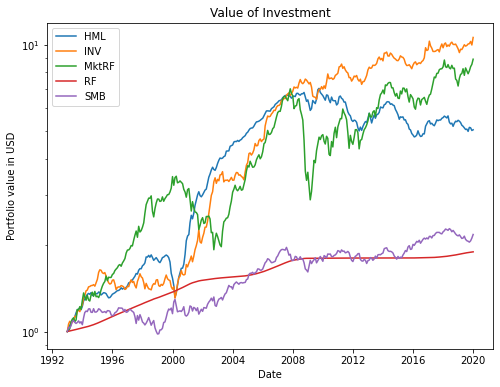

In [34]:
plt.figure(figsize=(8,6))
plt.title('Value of Investment')

for portfolio in pltdata:
    if portfolio in ports1:
        plt.plot(pltdata.date, pltdata[portfolio], label = portfolio)

plt.xlabel('Date')
plt.ylabel('Portfolio value in USD')
plt.legend()

plt.yscale('log')

plt.show()

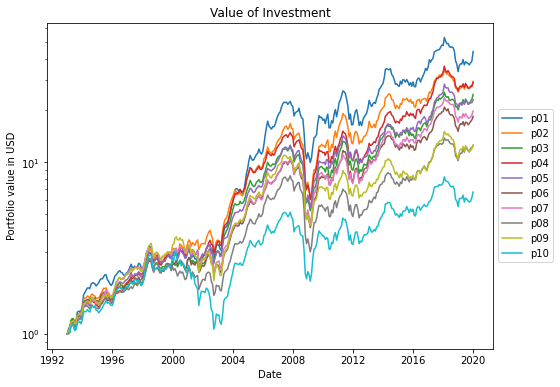

In [35]:
plt.figure(figsize=(8,6))
plt.title('Value of Investment')

for portfolio in pltdata:
    if portfolio != 'date':
        if portfolio in ports2:
            plt.plot(pltdata.date, 
                     pltdata[portfolio], 
                     label = portfolio)

plt.xlabel('Date')
plt.ylabel('Portfolio value in USD')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.yscale('log')

plt.show()